# Comparison study of the selected metrics of Wasserstein-2 and Cramer-von Mises 

In [1]:
import sys
sys.path.append('./Scripts')

In [2]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ot
from ot.datasets import make_1D_gauss as gauss
from Scripts import ComputeW2, ComputeCramerVonMises

In [3]:
n = 360
x = np.arange(n, dtype=np.float64)
dx = x[1] - x[0]
examples = []
cdfs = []
samples = []
bins = np.arange(0,360,5)

# first comparison pair
dis1 = gauss(n, m=90, s=20)+gauss(n, m=(360-90), s=20)
dis1 = dis1 / np.sum(dis1)  # Normalize the distribution
examples.append(dis1)
cdfs.append(np.cumsum(dis1)*dx)
dis2 = gauss(n, m=90, s=20)+gauss(n, m=(360-90), s=20)
dis2 = dis2 / np.sum(dis2)  # Normalize the distribution
examples.append(dis2)
cdfs.append(np.cumsum(dis2)*dx)   

#second comparison pair
dis3 = gauss(n, m=0, s=10)+gauss(n, m=360, s=10)
dis3 = dis3 / np.sum(dis3)  # Normalize the distribution
examples.append(dis3)
cdfs.append(np.cumsum(dis3)*dx)
dis4 = gauss(n, m=10, s=10)+gauss(n, m=350, s=10)
dis4 = dis4 / np.sum(dis4)  # Normalize the distribution
examples.append(dis4)
cdfs.append(np.cumsum(dis4)*dx)

# third comparison pair
dis5 = gauss(n,m=73,s=10)+gauss(n,m=(360-73),s=10) 
dis5 = dis5 / np.sum(dis5)  # Normalize the distribution
examples.append(dis5)
cdfs.append(np.cumsum(dis5)*dx)
dis6 = gauss(n,m=73,s=16)+gauss(n,m=(360-73),s=16) 
dis6 = dis6 / np.sum(dis6)  # Normalize the distribution
examples.append(dis6)
cdfs.append(np.cumsum(dis6)*dx)

# fourth comparison pair
dis7 = 6*gauss(n, m=180, s=10)+gauss(n, m=0, s=10)+gauss(n, m=360, s=10)
dis7 = dis7 / np.sum(dis7)  # Normalize the distribution
examples.append(dis7)
cdfs.append(np.cumsum(dis7)*dx)
dis8 = (1/6)*gauss(n, m=180, s=10)+gauss(n, m=0, s=10)+gauss(n, m=360, s=10)
dis8 = dis8 / np.sum(dis8)  # Normalize the distribution
examples.append(dis8)
cdfs.append(np.cumsum(dis8)*dx)

In [4]:
dis9 = 2*gauss (n, m=180, s=2)
dis9 = dis9 / np.sum(dis9) 
dis10 = gauss (n, m=0, s=10)+gauss (n, m=360, s=10)
dis10 = dis10 / np.sum(dis10)
dis11 = 2*gauss(n, m=180, s=90)
dis11 = dis11 / np.sum(dis11)
dis12 = gauss(n, m=57, s=20)+gauss(n,m=360-57,s=20)+2*gauss(n, m=132, s=5)+2*gauss(n, m=360-132, s=5)+gauss(n, m=160, s=10)+gauss(n, m=360-160, s=10) 
dis12 = dis12 / np.sum(dis12)  # Normalize the distribution
examples.append(dis9)
examples.append(dis10)
examples.append(dis11)
examples.append(dis12)
cdfs.append(np.cumsum(dis9)*dx)
cdfs.append(np.cumsum(dis10)*dx)
cdfs.append(np.cumsum(dis11)*dx)
cdfs.append(np.cumsum(dis12)*dx)

In [5]:
for i in range(len(examples)):
    samples.append(np.random.choice(x, size=1000, p=examples[i]))

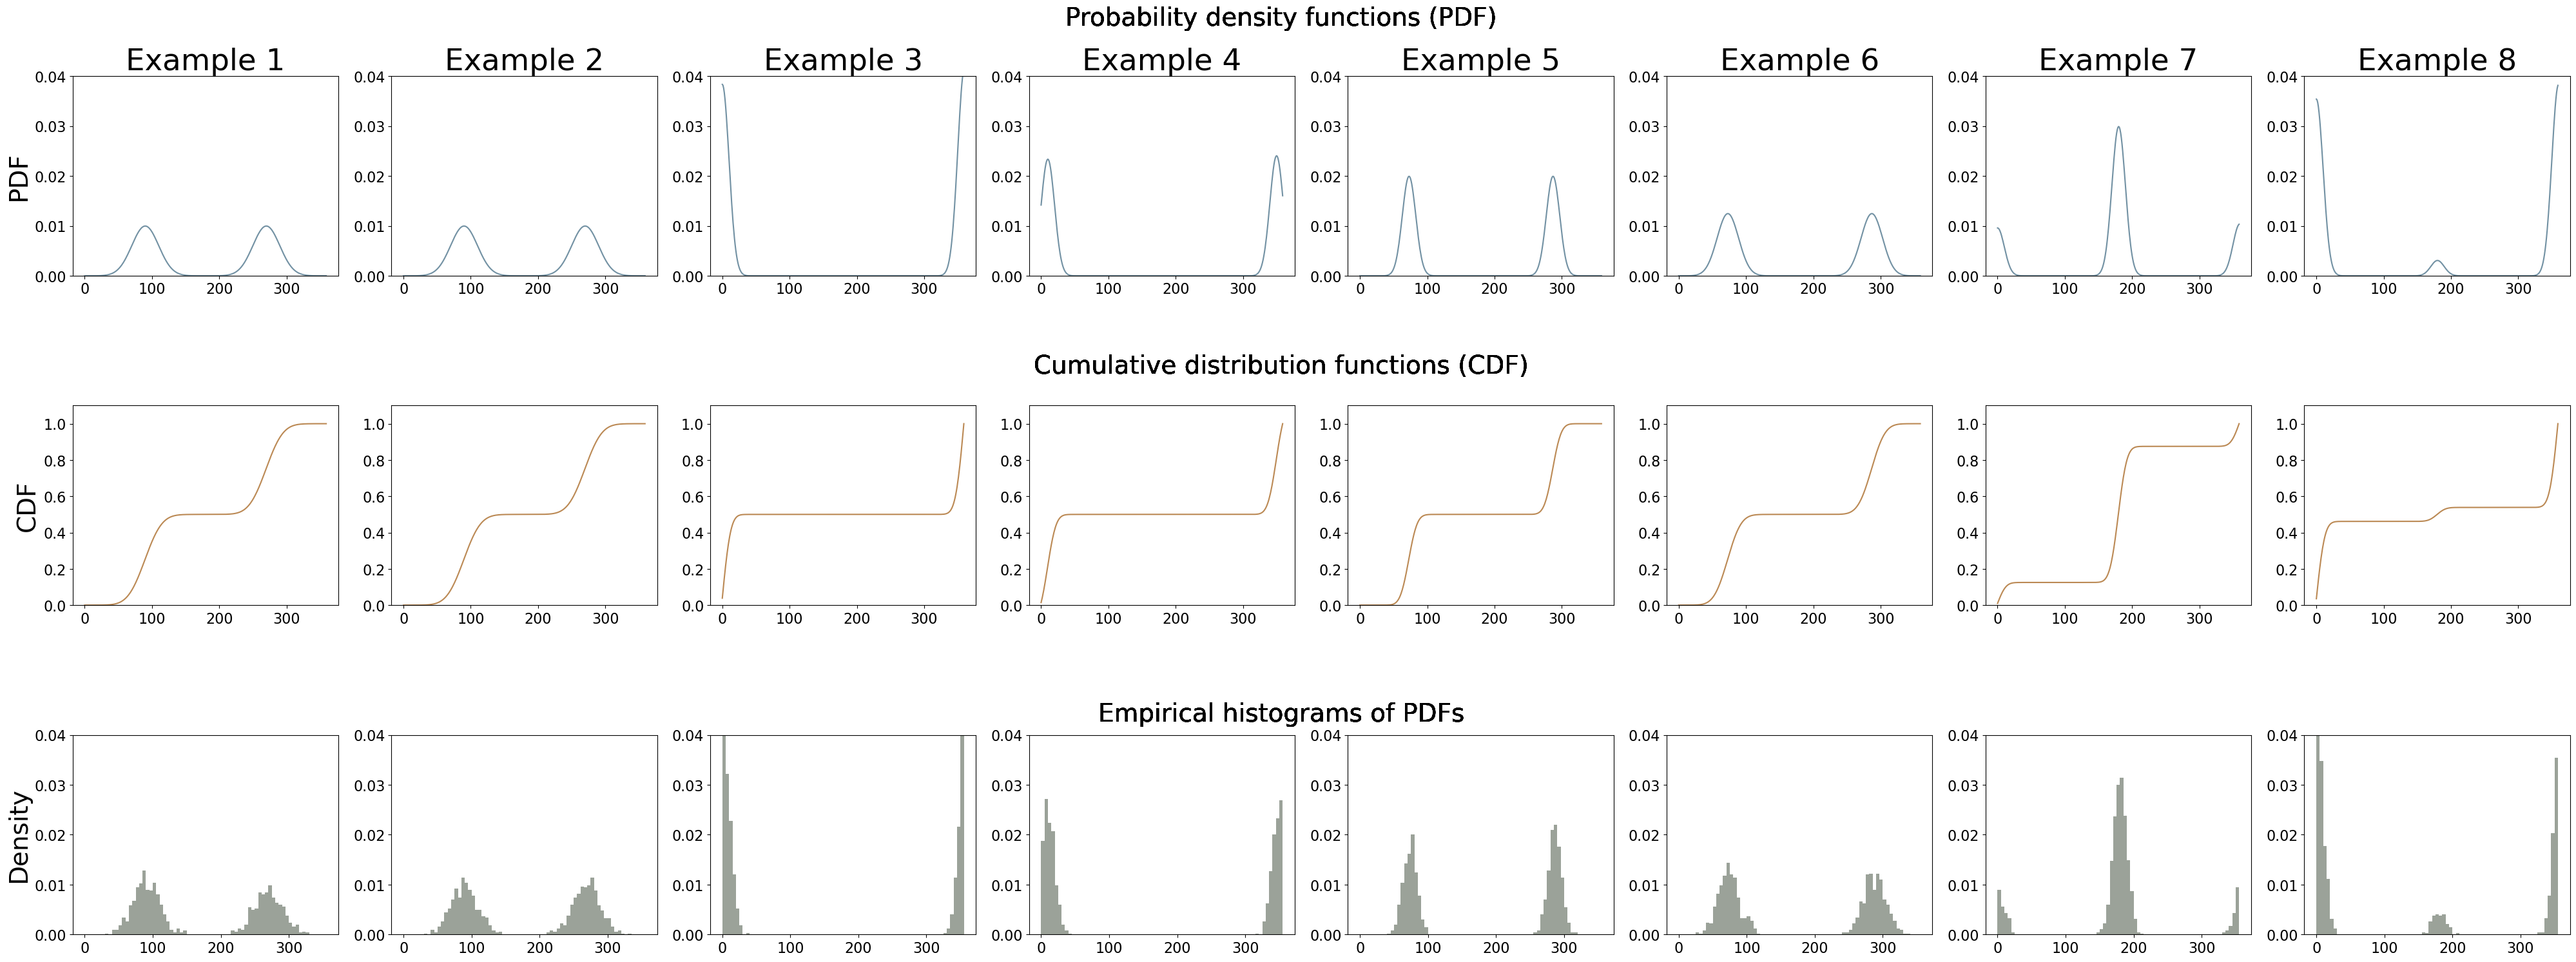

In [6]:
plt.rcParams['font.size'] = 28
fig, ax = plt.subplots(3, 8, figsize=(50, 18))
titles = ['Probability density functions (PDF)', 'Cumulative distribution functions (CDF)', 'Empirical histograms of PDFs']
colorCodes = ['#7291a3', '#bb8954', '#384634']
toPlot = [0, 1, 2, 3, 4, 5, 6, 7]  # Indices of the examples to plot
for i, val in enumerate(toPlot):
    ax[0][i].plot(x, examples[val],color=colorCodes[0])
    ax[0][i].set_ylim(0, 0.04)
    ax[0][i].set_title(f"Example {i+1}")
    ax[1][i].plot(x, cdfs[val], label='CDF', color=colorCodes[1])
    ax[1][i].set_ylim(0, 1.1)
    ax[2][i].hist(samples[val], bins=bins, density=True, label='Samples', color=colorCodes[2], alpha=0.5)
    ax[2][i].set_ylim(0, 0.04)
    for j in range(3):
        ax[j][0].figure.text(0.5, 0.9 - 0.3*j, titles[j], ha='center', va='center')
        ax[j][i].tick_params(axis='both', labelsize=16)
        ax[j][i].set_xlabel(ax[j][i].get_xlabel())
        ax[j][i].set_ylabel(ax[j][i].get_ylabel())
    ax[0][0].set_ylabel('PDF')
    ax[1][0].set_ylabel('CDF')
    ax[2][0].set_ylabel('Density')
plt.subplots_adjust(hspace=0.65, top=0.85)

In [7]:
fig.savefig('/tmp/metricComparisonW2omega.pdf', bbox_inches='tight',dpi=800)

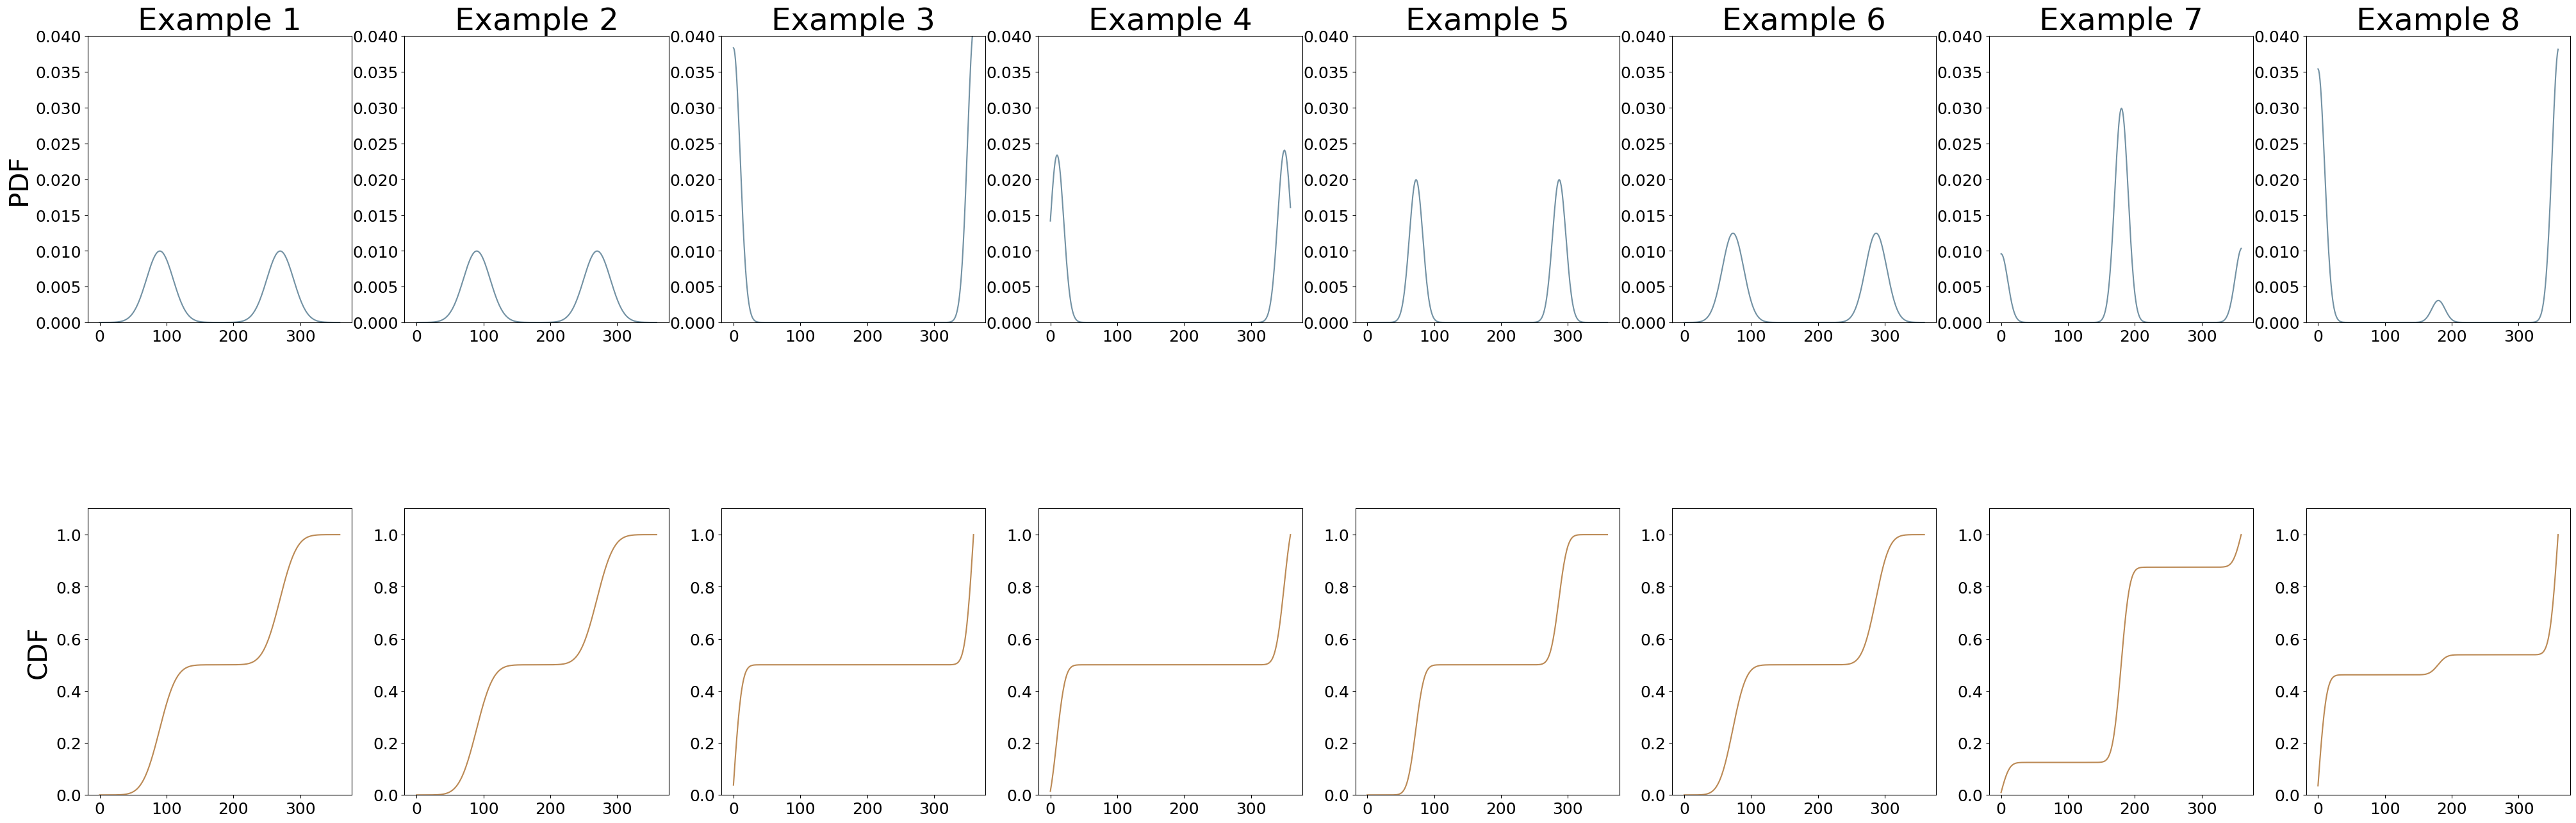

In [7]:
plt.rcParams['font.size'] = 29
fig, ax = plt.subplots(2, 8, figsize=(50, 16),sharey=False)
titles = ['Probability density functions (PDF)', 'Cumulative distribution functions (CDF)', 'Empirical histograms of PDFs']
colorCodes = ['#7291a3', '#bb8954', '#384634']
toPlot = [0, 1, 2, 3, 4, 5, 6, 7]  # Indices of the examples to plot
for i, val in enumerate(toPlot):
    ax[0][i].plot(x, examples[val],color=colorCodes[0])
    ax[0][i].set_ylim(0, 0.04)
    ax[0][i].set_title(f"Example {i+1}")
    ax[1][i].plot(x, cdfs[val], label='CDF', color=colorCodes[1])
    ax[1][i].set_ylim(0, 1.1)
    for j in range(2):
        ax[j][i].tick_params(axis='both', labelsize=18)
        ax[j][i].set_xlabel(ax[j][i].get_xlabel())
        ax[j][i].set_ylabel(ax[j][i].get_ylabel())
    ax[0][0].set_ylabel('PDF')
    ax[1][0].set_ylabel('CDF')
plt.subplots_adjust(hspace=0.65, top=0.85)

In [9]:
fig.savefig('/tmp/metricComparisonW2omega.pdf', bbox_inches='tight',dpi=800)

In [12]:
w2s = []
for i in range(4):
    w2s.append([i, ComputeW2(samples[i*2], samples[i*2+1], False)])
w2s = pd.DataFrame(w2s, columns=['Pair', 'w2'])
w2s.sort_values(by='w2', ascending=False, inplace=False)

,Pair,w2
3,3,0.369250
2,2,0.021482
1,1,0.014855
0,0,0.005969


In [13]:
omegas = []
for i in range(4):
    omegas.append([i, ComputeCramerVonMises(samples[i*2], samples[i*2+1], False)])
omegas = pd.DataFrame(omegas, columns=['Pair', 'omega'])
omegas.sort_values(by='omega', ascending=False, inplace=False)

,Pair,omega
3,3,0.140102
1,1,0.067817
2,2,0.030543
0,0,0.003741
